In [1]:
import pickle
file = open('X_test_bi', 'rb')

# dump information to that file
X_test = pickle.load(file)

# close the file
file.close()

In [2]:
import pickle
file = open('y_test_bi', 'rb')

# dump information to that file
y_test = pickle.load(file)

# close the file
file.close()

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Color change

In [9]:
X_test=np.stack([X_test]*3, axis=-1)

In [ ]:
plt.imshow(X_test[2])

In [7]:
X_test = X_test / 255.0

## Evaluate Model

In [4]:
from tensorflow.keras import models
loaded_model = models.load_model('/Users/davidmedioni/code/dino120798/finalproject/model_bi_2')

In [5]:
loaded_model

In [10]:
loaded_model.evaluate(X_test, y_test, verbose=1)

16/16 [==============================] - 5s 308ms/step - loss: 0.2016 - accuracy: 0.9158


[0.20162850618362427, 0.9158316850662231]

Scores

In [11]:
y_true = y_test

In [12]:
y_test.shape

(499,)

In [13]:
y_pred = loaded_model.predict(X_test)

In [14]:
y_true_label = [np.argmax(x)for x in y_true]

In [15]:
y_pred_label = [np.argmax(x)for x in y_pred]

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [17]:
y_true_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
cm = confusion_matrix(y_true,y_pred_label)

In [19]:
labels = ['normal', 'diseased']

In [20]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

<AxesSubplot:>

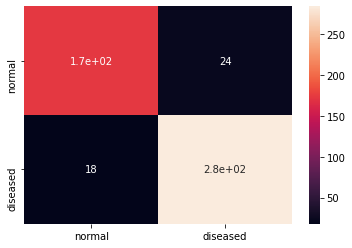

In [21]:
sns.heatmap(df_cm, annot=True)

In [22]:
target_names =['normal', 'diseased']
print(classification_report(y_true, y_pred_label, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.91      0.88      0.89       197
    diseased       0.92      0.94      0.93       302

    accuracy                           0.92       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.92      0.92      0.92       499

